# This is the Juypter Notebook containing simulations for Theorem 3 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [8]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

In [9]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [10]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    np.ones(config.N),
    np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    30 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.50050961 1.88605606 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.56211491
  1.67562643 0.        ]
 [0.19991683 1.79269898 0.1711156  0.         1.89839503 1.75372476
  0.         0.         1.61642985 1.98947965 0.         0.
  0.         0.         0.         1.91290717 0.         1.82915066
  0.         0.        ]
 [0.         0.15255302 0.         1.81391791 0.         0.
  0.         1.85324135 0.         0.         0.         0.
  0.         1.63046893 1.52575372 1.52771313 0.         0.
  1.50982707 0.        ]
 [0.         1.73389734 1.95187889 0.         0.1062009  1.69746892
  0.         0.         1.89525712 0.         0.         0.
  1.64720756 0.         1.99329845 0.         0.         0.
  0.         1.520101  ]
 [0.         0.         0.         0.05966601 0.         1.88022167
  0.         0.         1.8831194  1.91327549 1.6035491  0.
  0.         

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_82735/1372662931.py:22: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_82735/1372662931.py:22: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_82735/1372662931.py:22: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_82735/1372662931.py:23: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_82735/1372662931.py:23: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_82735/1372662931.py:23: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


In [11]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 0.9785954397851361
spectral radius 2 is 1.0081991492504436
Theorem 2 satisfied: False
Theorem 3: 3.2


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 2791
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Main loop Converged at iteration 2552
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625
 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
Main loop Converged at iteration 2169
All assumptions satisfied
x1 is [0.5 0.5 0.5 0.5 0.5 0

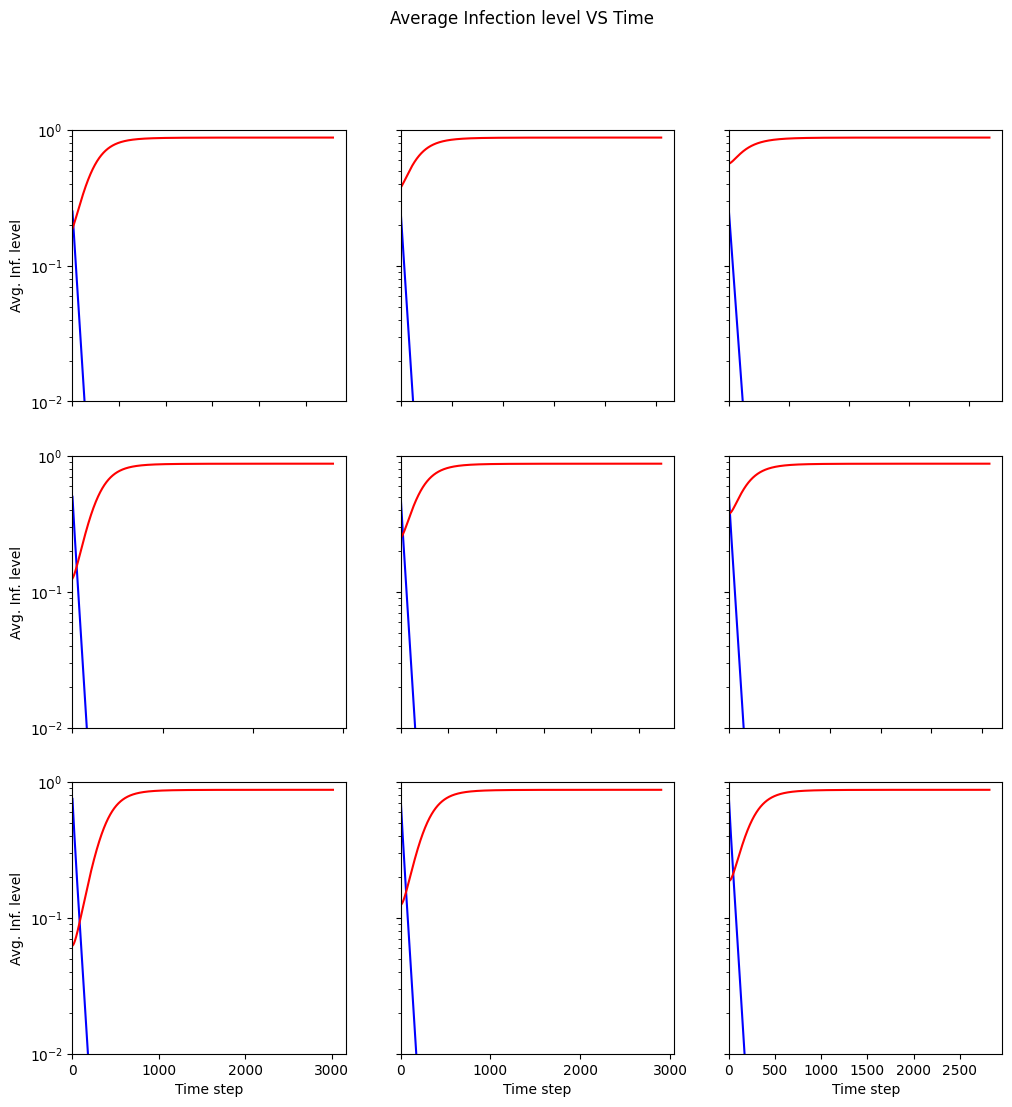

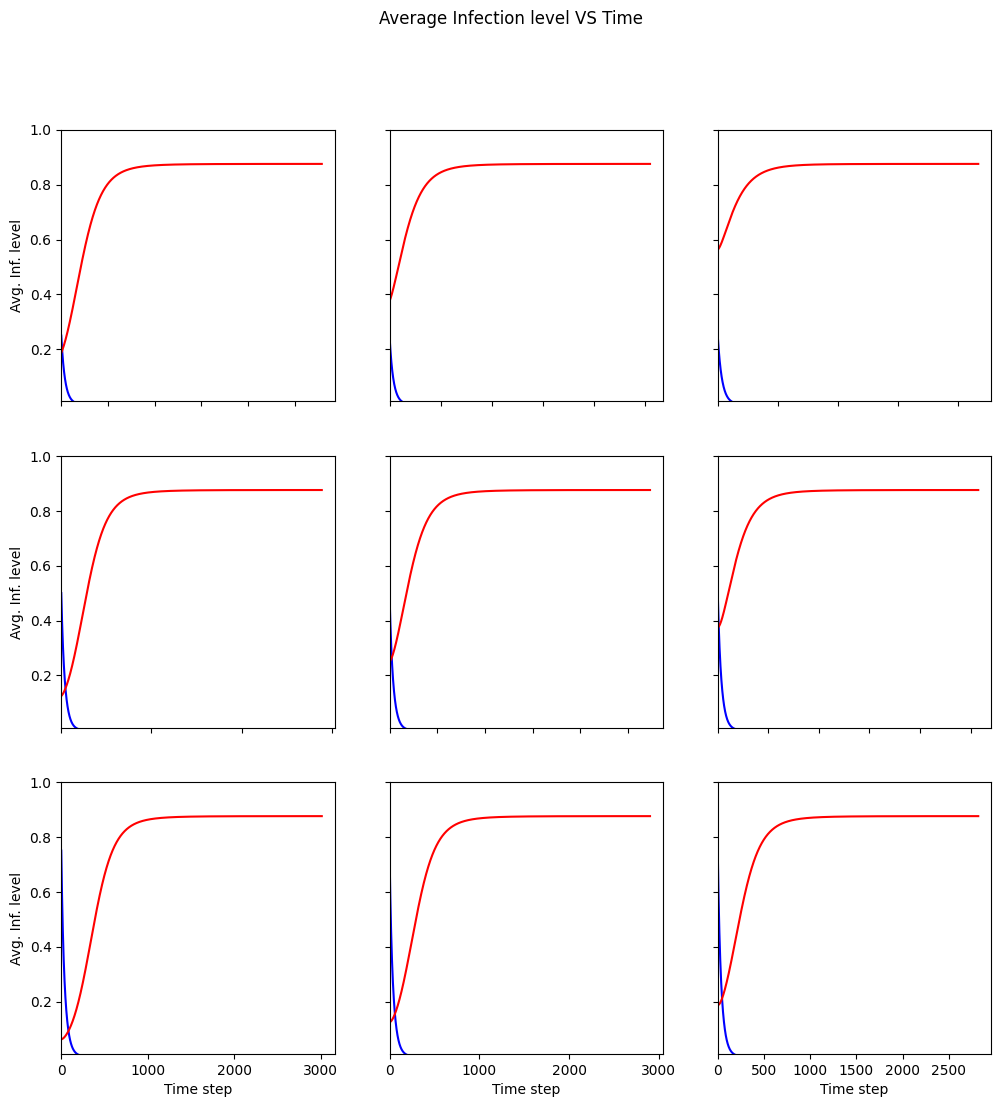

In [12]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

All assumptions satisfied


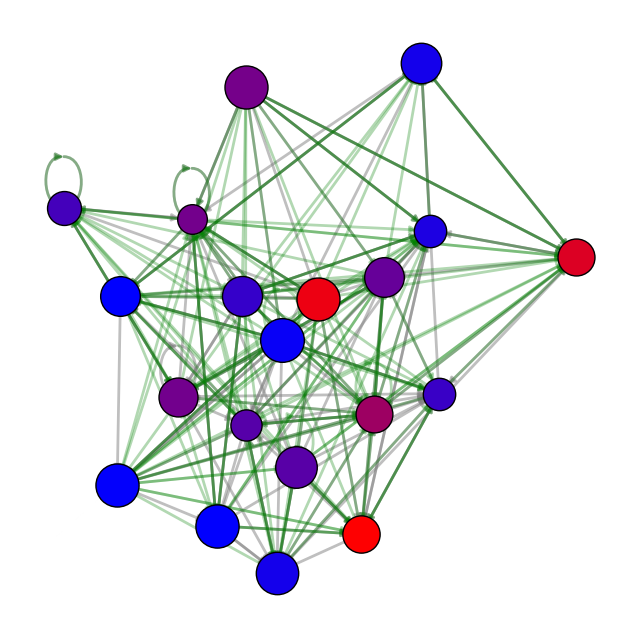

x1 is [0.31127872 0.38364256 0.43919249 0.22116931 0.19237218 0.83208136
 0.55697989 0.00164248 0.27123642 0.95474786 0.73484682 0.72423166
 0.08080753 0.50857948 0.3076487  0.60140527 0.94724075 0.1217502
 0.06587695 0.93659734]
x2 is [1.12374644e-01 3.10920546e-01 2.95123730e-01 3.52518584e-01
 9.86496219e-02 7.00685675e-02 2.94007714e-01 5.98079065e-01
 7.76597159e-02 3.05947756e-02 7.72652015e-04 6.08075194e-02
 5.02168777e-01 4.33925664e-01 3.99722465e-02 1.56603885e-01
 5.55712391e-03 1.00022558e-01 8.71971172e-01 1.04123737e-02]
Main loop Converged at iteration 2876


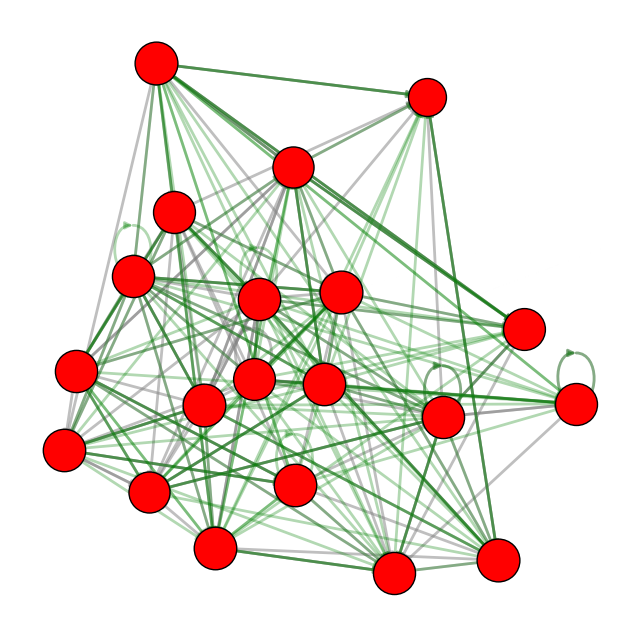

All assumptions satisfied


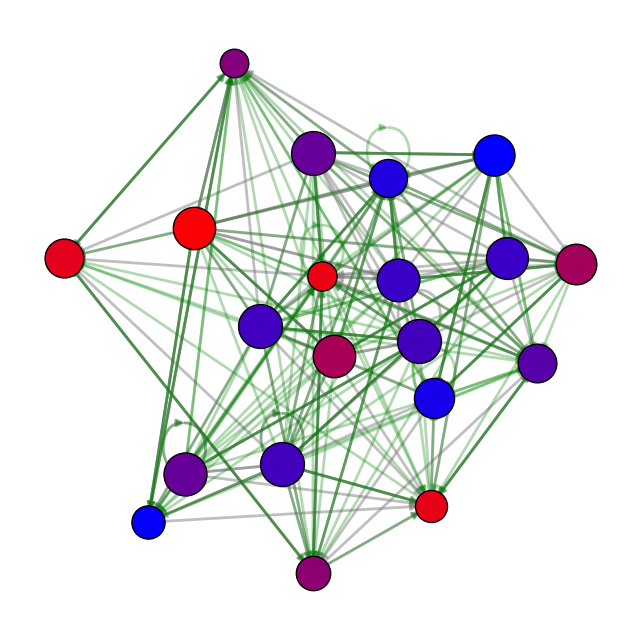

x1 is [0.56113589 0.73488032 0.74302736 0.56107318 0.71098811 0.28499194
 0.69571449 0.80902532 0.59604028 0.01551895 0.19916341 0.07449261
 0.08483247 0.37952064 0.01730086 0.30614106 0.66695458 0.73808215
 0.02956092 0.44569777]
x2 is [0.37698379 0.26227337 0.25170293 0.08132496 0.20590582 0.50565695
 0.06629723 0.00868346 0.39680393 0.19202236 0.24568755 0.61503464
 0.09106537 0.00637582 0.88273818 0.59520536 0.19711095 0.25987105
 0.30102887 0.23398678]
Main loop Converged at iteration 2215


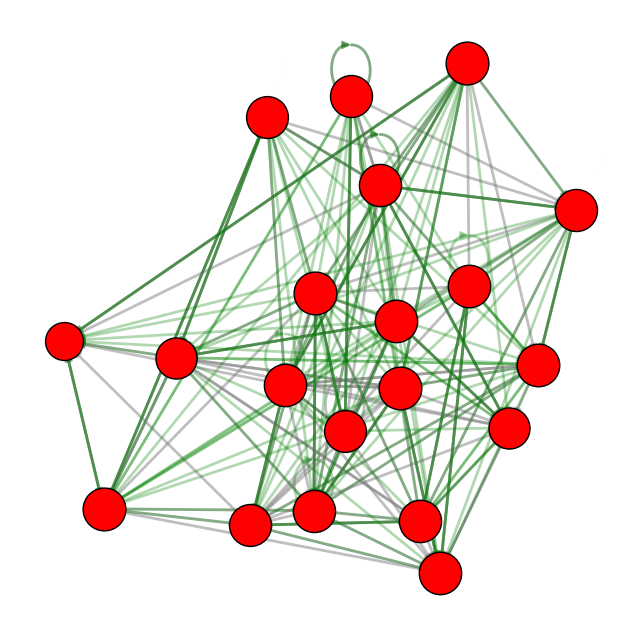

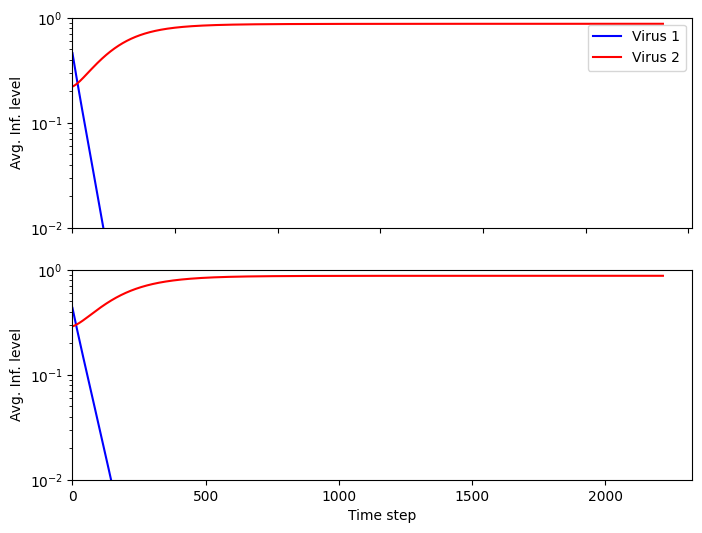

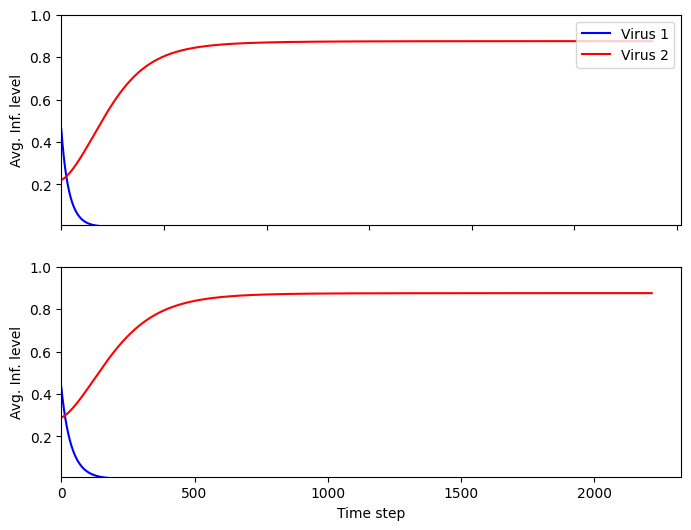

In [13]:
import networkx as nx
# Completely random initializations
x1_avg_histories = []
x2_avg_histories = []
B1 = nx.from_numpy_array(B[0], create_using=nx.DiGraph) 
B2 = nx.from_numpy_array(B[1], create_using=nx.DiGraph)
default_pos = nx.spring_layout(B1)

for i in range(2):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    # bivirus.plot_two_networks_piechart_nodes(B1, B2, x1, x2, pos1=default_pos, pos2=default_pos)
    bivirus.plot_bivirus_graph(A1, A2, x1, x2)
    print("x1 is "+str(x1))
    print("x2 is "+str(x2))
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
    # bivirus.plot_two_networks_piechart_nodes(B1, B2, results["x1_history"][-1], results["x2_history"][-1], pos1=default_pos, pos2=default_pos)
    bivirus.plot_bivirus_graph(A1, A2, results["x1_history"][-1], results["x2_history"][-1])

bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, yscale='linear')


Let us examine the single-virus equilibrium $(0, \bar{x}_2)$

In [14]:
x1_bar = [x1_avg_histories[i][-1] for i in range(len(x1_avg_histories))]
print(x1_bar)
print("average of equilibria of virus 1 across 9 simulations, should not be very close to zero(virus 1 dies out):", np.mean(x1_bar))
print("variance of equilibria of virus 1 across 9 simulations: ", np.var(x1_bar), "\n")

x2_bar = [x2_avg_histories[i][-1] for i in range(len(x2_avg_histories))]
print(x2_bar)
print("average of equilibria of virus 2 across 9 simulations, should not be very close to zero:", np.mean(x2_bar))
print("variance of equilibria of virus 2 across 9 simulations: ", np.var(x2_bar))

[np.float64(3.288139452773787e-37), np.float64(5.952149893403995e-29)]
average of equilibria of virus 1 across 9 simulations, should not be very close to zero(virus 1 dies out): 2.9760749631426947e-29
variance of equilibria of virus 1 across 9 simulations:  8.857021990529803e-58 

[np.float64(0.8754789329922208), np.float64(0.8754782651550718)]
average of equilibria of virus 2 across 9 simulations, should not be very close to zero: 0.8754785990736462
variance of equilibria of virus 2 across 9 simulations:  1.1150161440496684e-13
